##Install necessary modules

In [ ]:
!pip install transformers==4.17.0
!pip install detoxify
!pip install datasets
# !pip install autoPytorch

     |████████████████████████████████| 3.8 MB 10.1 MB/s 
     |████████████████████████████████| 895 kB 33.5 MB/s 
     |████████████████████████████████| 596 kB 16.2 MB/s 
     |████████████████████████████████| 6.6 MB 30.0 MB/s 
     |████████████████████████████████| 77 kB 5.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 1.2 MB 10.8 MB/s 
     |████████████████████████████████| 325 kB 10.4 MB/s 
     |████████████████████████████████| 136 kB 38.8 MB/s 
     |████████████████████████████████| 1.1 MB 25.5 MB/s 
     |████████████████████████████████| 212 kB 50.3 MB/s 
     |████████████████████████████████| 127 kB 47.9 MB/s 
     |████████████████████████████████| 94 kB 3.0 MB/s 
     |████████████████████████████████| 144 kB 35.7 MB/s 
     |████████████████████████████████| 271 kB 49.1 MB/s 
  Attempting uninstall: urllib3
    Found e

##Connecting to Drive stuff. 
Mount + go to correct directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = 'drive/MyDrive/Colab Notebooks/CSS Project' 
%cd $path

/content/drive/MyDrive/Colab Notebooks/CSS Project


## Extremely Important Imports

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

##Visualizing data through counting the # of each class.

In [ ]:
from collections import Counter

# Function that counts the number of each label in a csv
def count_labels(df):
  classes = df["class"]
  return Counter(classes)

path = 'Clean_Post_data.csv'
df = pd.read_csv(path)

print(count_labels(df))

Counter({14: 269, 8: 116, 4: 111, 1: 104, 5: 89, 17: 67, 18: 66, 23: 35, 19: 32, 13: 13, 11: 13, 7: 12, 21: 12, 2: 10, 20: 10, 22: 9, 6: 8, 10: 8, 15: 7, 0: 6, 9: 4, 12: 4, 3: 1, 16: 1})


## Two class shifts. 
1. Data centric. Focus on clustering data by shape to improve topic models. 
2. Content centric. Focus on clustering data by content for visualization/information purposes.

23 classes is a lot. Some classes can fit within the same label, so we shrink the classes a bit. 

In [ ]:
# Function that transforms raw classes to data classes. All hardcoded.
# Information about specific class tags are in the main spreadsheet

def data_label_shift(df):
  df['class'] = df['class'].map(lambda label: data_shift_rules(label))
  return df

def data_shift_rules(val):
  # bucket_0 = [0, 1]
  # bucket_1 = [2, 3, 9, 13, 16, 20, 23]
  # bucket_2 = [4]
  # bucket_3 = [5]
  # bucket_4 = [6, 7, 8, 10, 12]
  # bucket_5 = [11, 14]
  # bucket_6 = [15, 17]
  # bucket_7 = [18, 19, 21, 22]
  bucket_0 = [0]
  bucket_1 = [1]
  bucket_2 = [2]
  bucket_3 = [3]
  bucket_4 = [4]
  bucket_5 = [5]
  bucket_6 = [6]
  bucket_7 = [7, 8, 9, 10]
  buckets = [bucket_0, bucket_1, bucket_2, bucket_3, bucket_4, bucket_5, bucket_6, bucket_7]
  for i in range(len(buckets)):
    if val in buckets[i]:
      return i
# Function that transforms raw classes to content classes. All hardcoded.
# Information about specific class tags are in the main spreadsheet

def content_label_shift(df):
  df['class'] = df['class'].map(lambda label: content_shift_rules(label))
  return df
def content_shift_rules(val):
  b_0 = [0]
  b_1 = [1]
  b_2 = [2, 3, 9, 16, 23]
  b_3 = [4]
  b_4 = [5]
  b_5 = [6]
  b_6 = [7]
  b_7 = [8, 12]
  b_8 = [10]
  b_9 = [11, 14]
  b_10 = [13]
  b_11 = [15, 17]
  b_12 = [18]
  b_13 = [19]
  b_14 = [20]
  b_15 = [21]
  b_16 = [22]
  buckets = [b_0, b_1, b_2, b_3, b_4, b_5, b_6, b_7, b_8, b_9, b_10, b_11, b_12, b_13, b_14, b_15, b_16]
  for i in range(len(buckets)):
    if val in buckets[i]:
      return i
#Function that splits squeezed data into binary classes (personal story/not personal story)
def data_label_shift(df):
  df['class'] = df['class'].map(lambda label: data_shift_rules(label))
  return df
def binary_shift_rules(val):
  bucket_0 = [5]
  bucket_1 = [0, 1, 2, 3, 4, 6, 7]
  buckets = [bucket_0, bucket_1]
  for i in range(len(buckets)):
    if val in buckets[i]:
      return i
def binary_label_shift(df):
  df['class'] = df['class'].map(lambda label: binary_shift_rules(label))
  return df
  
df = pd.read_csv("Clean_Post_data.csv")
df = content_label_shift(df)
df.to_csv("Content_Post_data.csv")
print(df[190:200])
count_labels(df)

                                                  link  class
190  https://www.reddit.com/r/antiwork/comments/qmy...      7
191  https://www.reddit.com/r/antiwork/comments/qst...      9
192  https://www.reddit.com/r/antiwork/comments/r1l...      9
193  https://www.reddit.com/r/antiwork/comments/r3a...     12
194  https://www.reddit.com/r/antiwork/comments/reh...     11
195  https://www.reddit.com/r/antiwork/comments/riq...      9
196  https://www.reddit.com/r/antiwork/comments/rqw...      2
197  https://www.reddit.com/r/antiwork/comments/s1f...      7
198  https://www.reddit.com/r/antiwork/comments/s3d...      3
199  https://www.reddit.com/r/antiwork/comments/sbh...      4


Counter({0: 6,
         1: 104,
         2: 51,
         3: 111,
         4: 89,
         5: 8,
         6: 12,
         7: 120,
         8: 8,
         9: 282,
         10: 13,
         11: 74,
         12: 66,
         13: 32,
         14: 10,
         15: 12,
         16: 9})

## Adding an ID row from the url
ID row helps connect this spreadsheet with the raw data for df merges.

In [ ]:
# Already ran, but this method pulls the ID from each reddit link and adds it as an extra column. This ID column allows DF merges
def add_id_row(df):
    ids = []
    for index, row in df.iterrows():
        k = row['link'].split('/')
        ids.append(k[6])
    df.insert(0, "id", ids, True)
    df.to_csv('Clean_Post_Data.csv')
    print(df[0:10])
add_id_row(df)

       id                                               link  class
0  39l6fp  https://www.reddit.com/r/antiwork/comments/39l...      0
1  4l6zjo  https://www.reddit.com/r/antiwork/comments/4l6...      0
2  3cbv5q  https://www.reddit.com/r/antiwork/comments/3cb...      0
3  3omed5  https://www.reddit.com/r/antiwork/comments/3om...      0
4  2twexa  https://www.reddit.com/r/antiwork/comments/2tw...      0
5  3u8c8t  https://www.reddit.com/r/antiwork/comments/3u8...      0
6  351qkm  https://www.reddit.com/r/antiwork/comments/351...      1
7  3auv1l  https://www.reddit.com/r/antiwork/comments/3au...      0
8  4og00w  https://www.reddit.com/r/antiwork/comments/4og...      0
9  4eaw1n  https://www.reddit.com/r/antiwork/comments/4ea...      0


## Adding raw features
Just a simple merge with the original raw spreadsheet. The labeled data just has url + class, raw has everything else (text, is_image, etc.)

In [ ]:
all_submissions_path = 'all_submissions.csv'

# Merges labeled data with raw dataset to pull all features
def add_raw_features(df, raw_data_path):
    clean = df
    raw = pd.read_csv(raw_data_path, index_col = 0)
    merged = pd.merge(clean, raw, left_on="id", right_on="id", how="left")
    print(merged[0:10])
    return merged
df = add_raw_features(df, all_submissions_path)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  # Remove the CWD from sys.path while we load stuff.


       id                                               link  class  \
0  39l6fp  https://www.reddit.com/r/antiwork/comments/39l...      0   
1  4l6zjo  https://www.reddit.com/r/antiwork/comments/4l6...      0   
2  3cbv5q  https://www.reddit.com/r/antiwork/comments/3cb...      0   
3  3omed5  https://www.reddit.com/r/antiwork/comments/3om...      0   
4  2twexa  https://www.reddit.com/r/antiwork/comments/2tw...      0   
5  3u8c8t  https://www.reddit.com/r/antiwork/comments/3u8...      0   
6  351qkm  https://www.reddit.com/r/antiwork/comments/351...      1   
7  3auv1l  https://www.reddit.com/r/antiwork/comments/3au...      0   
8  4og00w  https://www.reddit.com/r/antiwork/comments/4og...      0   
9  4eaw1n  https://www.reddit.com/r/antiwork/comments/4ea...      0   

                                               title  \
0  Temp Hides Fun, Fulfilling Life From Rest Of O...   
1                                Your Life Is Wasted   
2  Study: Many admit to drinking, doing drugs whi.

# Random Forest
We will attempt to use the random forest to build a baseline classifier that only uses text and post features. 

We are adding several extra text features here.
 That is, number of unique words in a post, name of the linked URL, and the length of the post (which isn't added here but is in the main function)

In [ ]:
## Function that counts unique words. Used as lambda function.
def count_unique_words(data):
    data = data.split(' ')
    count = len(set(data))
    return count

## Function that pulls the site from the supplied link
## This helps differentiate links/images from normal text because they will link to a different site
## Sometimes there is no link. Replaced with "None"

def pull_name_from_url(url):
    if type(url) != str:
      return "None"
    parts = url.split('/')
    name = parts[2]
    return name

# pull_name_from_url("https://www.theonion.com/article/temp-hides-fun")

#Instantiate models to derive features from text

## There are 4 features.
1. Toxicity of text
2. Emotional sentiment of text (Sad, happy, angry)
3. Valence of text (Positive, Neutral, Negative)
4. Valence score (0 - 1)

In [ ]:
from transformers import pipeline
from detoxify import Detoxify

toxicity_model = Detoxify('unbiased', device='cuda')
emotion_sentiment_model = pipeline("text-classification",model='bhadresh-savani/bert-base-uncased-emotion', return_all_scores=False, truncation = True)
valence_model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
valence_sentiment_model = pipeline("sentiment-analysis", model = valence_model_path, tokenizer = valence_model_path, max_length = 512, truncation = True)
# path = '../../data/labeled_data/Clean_Post_Data.csv'

## Sanity test to make sure models are working

In [ ]:
print(toxicity_model.predict("Man work is rough"))
print(emotion_sentiment_model("Man work is rough"))
print(valence_sentiment_model("Man work is rough"))

{'toxicity': 0.0031205649, 'severe_toxicity': 1.3883252e-05, 'obscene': 0.00019282907, 'identity_attack': 0.0005151768, 'insult': 0.0007259051, 'threat': 9.910632e-05, 'sexual_explicit': 0.00024452267}
[{'label': 'anger', 'score': 0.7847622036933899}]
[{'label': 'Negative', 'score': 0.8896994590759277}]


## Adding all extra features to the dataframe & saving as CSV

In [ ]:
def add_extra_features(df):

    df['body'] = df['body'].map(lambda body: str(body))
    df['title'] = df['title'].map(lambda title: str(title))
    
    df['length'] = df['body'].map(lambda body: len(body))
    df['count'] = df['body'].map(lambda body: count_unique_words(body))
    df['linked_site'] = df['url'].map(lambda url: pull_name_from_url(url))

    df['title_emotion'] = df['title'].map(lambda title: emotion_sentiment_model(title)[0]['label'])
    df['title_valence'] = df['title'].map(lambda title: valence_sentiment_model(title)[0]['label'])
    df['title_valence_score'] = df['title'].map(lambda title: valence_sentiment_model(title)[0]['score'])
    df['title_toxicity'] = df['title'].map(lambda title: toxicity_model.predict(title)['toxicity'])

    df['emotion'] = df['body'].map(lambda body: emotion_sentiment_model(body)[0]['label'])
    df['valence'] = df['body'].map(lambda body: valence_sentiment_model(body)[0]['label'])
    df['valence_score'] = df['body'].map(lambda body: valence_sentiment_model(body)[0]['score'])
    df['toxicity'] = df['body'].map(lambda body: toxicity_model.predict(body)['toxicity'])
    df.to_csv("data_extra_features.csv")
    return df
    # 3. sentiment of the text
    # 4. Toxicity of the text
    # 5. url of the text
df = add_extra_features(df)

# df["combined"] = df["title"] + ' ' + df["body"]

##Plotting counts of all data

In [ ]:
df = pd.read_csv("data_extra_features_binary.csv", index_col = 0)
# df = df.fillna('')
# meme_df = df[(df['class'] == 3)] # Longer than tweet/other image, count is inbetween tweet/other image. More negative in valence
# meme_hist = meme_df.hist('title_toxicity', bins = 50)
# meme_bar = meme_df['is_image'].value_counts().plot(kind='bar')

# tweet_df = df[(df['class'] == 7)] #Length inbetween tweet and other image, longest count.
# tweet_hist = tweet_df.hist('title_toxicity', bins = 50)
# tweet_bar = tweet_df['is_image'].value_counts().plot(kind='bar')

# other_image_df = df[(df['class'] == 4)] # Least count/length. Much happier emotion
# other_image_is_image_df = other_image_df[(other_image_df['is_image'] == False)]
# pd.set_option('display.max_colwidth',1000)

# print(other_image_is_image_df['link'])
# other_hist = other_image_df.hist('title_toxicity', bins = 50)
# other_image_bar = other_image_df['is_image'].value_counts().plot(kind='bar') 

# Plot distributions of length, count, toxicity 
# hist = df.hist('title_emotion', bins = 50) # Works for all numerical values

# Plot counts of sentiment, valence, linked_site
# bar = df['title_valence'].value_counts()[:20].plot(kind='bar') # Works for all nominal values

# Plot distribution of positive valence scores
# positive_df = df[(df['title_valence'] == "Positive")]
# positive_hist = positive_df.hist('valence_score', bins = 50)

# Plot distribution of neutral valence scores
# neutral_df = df[(df['title_valence'] == "Neutral")]
# neutral_hist = neutral_df.hist('valence_score', bins = 50)

# Plot distribution of negative valence scores
# negative_df = df[(df['title_valence'] == "Negative")]
# negative_hist = negative_df.hist('valence_score', bins = 50)

## Mapping text features to numbers

In [ ]:
# def cat_to_num(df, categories):
#   for i in categories:
#     df[i] = df[i].astype('category')
#     df[i] = df[i].cat.codes
#   return df
# df = cat_to_num(df, ['linked_site', 'emotion', 'title_valence', 'title_emotion', 'valence', 'is_image'])
valence_mapping = {label:idx for idx,label in enumerate(np.unique(df['valence']))}
emotion_mapping = {label:idx for idx,label in enumerate(np.unique(df['emotion']))}

title_valence_mapping = {label:idx for idx,label in enumerate(np.unique(df['title_valence']))}
title_emotion_mapping = {label:idx for idx,label in enumerate(np.unique(df['title_emotion']))}
# Done by count for implicit bias purposes
site_mapping = {label:idx for idx,label in enumerate(df['linked_site'].value_counts().index)}

def is_image_mapping(val):
  if val == False:
    return 0
  if val == True:
    return 1

def text_to_num_features(df):
  df['linked_site'] = df['linked_site'].map(lambda site: site_mapping[site])
  df['emotion'] = df['emotion'].map(lambda emotion: emotion_mapping[emotion])
  df['title_valence'] = df['title_valence'].map(lambda valence: valence_mapping[valence])
  df['title_emotion'] = df['title_emotion'].map(lambda emotion: emotion_mapping[emotion])
  df['valence'] = df['valence'].map(lambda valence: valence_mapping[valence])
  df['is_image'] = df['is_image'].map(lambda val: is_image_mapping(val))
  print(df[0:10])
  return df
df = text_to_num_features(df)

       id                                               link  class  \
0  39l6fp  https://www.reddit.com/r/antiwork/comments/39l...      1   
1  4l6zjo  https://www.reddit.com/r/antiwork/comments/4l6...      1   
2  3cbv5q  https://www.reddit.com/r/antiwork/comments/3cb...      1   
3  3omed5  https://www.reddit.com/r/antiwork/comments/3om...      1   
4  2twexa  https://www.reddit.com/r/antiwork/comments/2tw...      1   
5  3u8c8t  https://www.reddit.com/r/antiwork/comments/3u8...      1   
6  351qkm  https://www.reddit.com/r/antiwork/comments/351...      1   
7  3auv1l  https://www.reddit.com/r/antiwork/comments/3au...      1   
8  4og00w  https://www.reddit.com/r/antiwork/comments/4og...      1   
9  4eaw1n  https://www.reddit.com/r/antiwork/comments/4ea...      1   

                                               title  \
0  Temp Hides Fun, Fulfilling Life From Rest Of O...   
1                                Your Life Is Wasted   
2  Study: Many admit to drinking, doing drugs whi.

#Checking for invalid values

In [ ]:
# print(np.any(np.isnan(df)))
# print(np.all(np.isfinite(df)))

## Dropping useless categories

In [ ]:
def drop_categories(df):
  df = df.drop(columns = ['id', 'link', 'title', 'body', 'author', 'url', 'combined'])
  return df
# Label set
df = drop_categories(df)
y = df["class"]
df = df.drop(columns = "class")
for i in df['linked_site']:
  print(type(i))
# df = df.astype(float)

print(df[0:10])

## Normalize data



In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)

df = pd.DataFrame(scaled_df, columns = df.columns, index = df.index)
df = df.fillna(df.median())
print(df)


# df.to_csv("rf_data.csv")

      is_image  num_comments  num_upvotes    length     count  linked_site  \
0          0.0      0.000000     0.009603  0.000062  0.000000     0.054795   
1          0.0      0.000000     0.000640  0.000062  0.000000     0.945205   
2          0.0      0.000261     0.008323  0.000062  0.000000     0.219178   
3          0.0      0.000000     0.011524  0.000062  0.000000     0.657534   
4          0.0      0.000000     0.005122  0.000062  0.000000     0.027397   
...        ...           ...          ...       ...       ...          ...   
1014       1.0      0.000261     0.017926  0.007664  0.014370     0.013699   
1015       0.0      0.000392     0.017926  0.211900  0.258664     0.000000   
1016       0.0      0.000261     0.005122  0.000062  0.000000     0.027397   
1017       0.0      0.000131     0.004481  0.000062  0.000000     0.136986   
1018       1.0      0.000392     0.000640  0.023364  0.042265     0.013699   

      emotion  valence  valence_score  toxicity  title_emotion 

In [ ]:
df = replacement
replacement = df
df = df.drop(columns = ["title_valence_score", "title_emotion", "title_valence", "valence", "valence_score"])
print(replacement[0:5])

   is_image  num_comments  num_upvotes    length  count  linked_site  emotion  \
0       0.0      0.000000     0.009603  0.000062    0.0     0.054795      0.0   
1       0.0      0.000000     0.000640  0.000062    0.0     0.945205      0.0   
2       0.0      0.000261     0.008323  0.000062    0.0     0.219178      0.0   
3       0.0      0.000000     0.011524  0.000062    0.0     0.657534      0.0   
4       0.0      0.000000     0.005122  0.000062    0.0     0.027397      0.0   

   valence  valence_score  toxicity  title_emotion  title_valence  \
0      0.5       0.075688   0.00038            0.4            1.0   
1      0.5       0.075688   0.00038            0.8            0.0   
2      0.5       0.075688   0.00038            0.0            0.5   
3      0.5       0.075688   0.00038            0.4            0.5   
4      0.5       0.075688   0.00038            0.4            0.5   

   title_valence_score  title_toxicity  
0             0.777233        0.000802  
1             0.

## Run Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
clf = RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

(815, 9) (204, 9)
(815,) (204,)


RandomForestClassifier()

## Visualize impacts of features on results

Drop unimportant features

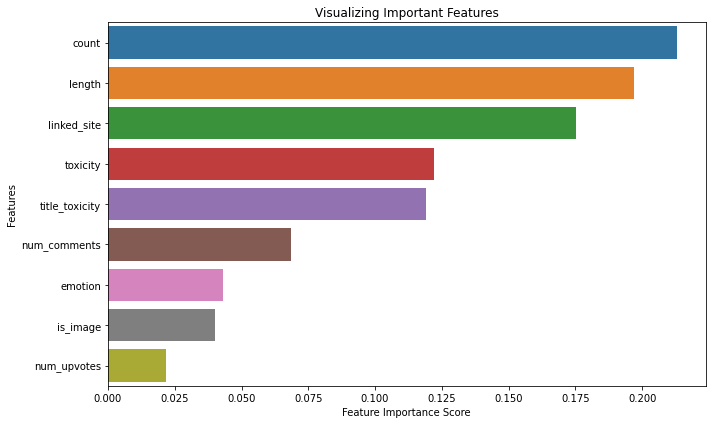

In [ ]:
import seaborn as sns
## TODO visualize importances of datapoint

feature_imp = pd.Series(clf.feature_importances_, index = df.columns).sort_values(ascending=False)

#print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

##Visualize RF results

Show Confusion matrix <br>
Show f1 scores

   Accuracy: 0.7990196078431373
              precision    recall  f1-score   support

           0       0.69      0.68      0.68        65
           1       0.85      0.86      0.85       139

    accuracy                           0.80       204
   macro avg       0.77      0.77      0.77       204
weighted avg       0.80      0.80      0.80       204



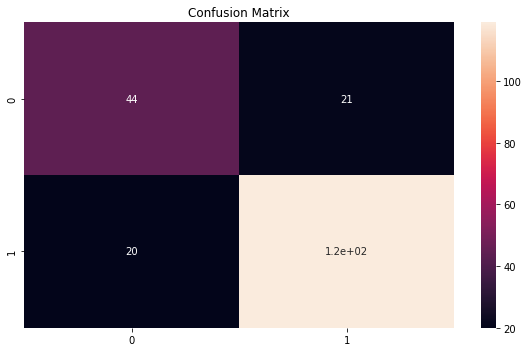

In [ ]:
from sklearn import metrics

#TODO Show Confusion matrix 
#TODO Show f1 scores/accuracy
y_pred = clf.predict(X_test)

print("   Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

print(classification_report(y_test,y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

# In this section we will test SVM and Logistic Regression <br>
We will try SVM on BOW(body) and BOW(title + body) <br>
We will try Logistic Regression on BOW(body and BOW(title + body) <br>

SVM on body: L2 loss, alpha = 1e-3, max_iter = 3 <br>
SVM on combined: L2 loss, alpha = 5e-4, max_iter = 5 <br>

Logistic Regression on body: C = 50, max_iter = 16 <br>
Logistic Regression on combined: C = 55, max_iter = 30 <br>



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_csv("data_extra_features_binary.csv", index_col = 0)
df = df.fillna('')

X = df.combined
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
# for i in range(5, 100, 5):
#   for j in range(10, 60, 5):
svm = Pipeline([('vect', CountVectorizer(stop_words='english')),
                  ('tfidf', TfidfTransformer()),
                   ('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=0.001, random_state=42, max_iter = 3, tol=None)),
                  # ('clf', LogisticRegression(n_jobs=1, C = 55, max_iter = 30))
                  ])
svm.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=3, random_state=42,
                               tol=None))])

# Evaluate accuracy on test set

In [ ]:
y_pred = svm.predict(X_test)
y_train_pred = svm.predict(X_train)

print('accuracy %s' % metrics.accuracy_score(y_pred, y_test))
# print(classification_report(y_train_pred, y_train,target_names=['0','1', '2', '3', '4', '5', '6', '7'])) # Train Accuracy
print(classification_report(y_pred, y_test, target_names=['0','1'])) # Test Accuracy

accuracy 0.8774509803921569
              precision    recall  f1-score   support

           0       0.76      0.78      0.77        54
           1       0.92      0.91      0.92       150

    accuracy                           0.88       204
   macro avg       0.84      0.85      0.84       204
weighted avg       0.88      0.88      0.88       204



#In this section we will finetune BERT for classification
We will classify body and title + body <br>
First, we must load the tokenizer and BERT.

In [ ]:
from transformers import AutoTokenizer
from transformers import TrainingArguments, Trainer, TrainerCallback
from datasets import load_metric
from transformers import AutoModelForSequenceClassification
from datasets import load_dataset
from datasets import Dataset

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=8)

loading configuration file https://huggingface.co/bert-base-cased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/a803e0468a8fe090683bdc453f4fac622804f49de86d7cecaee92365d4a0f829.a64a22196690e0e82ead56f388a3ef3a50de93335926ccfa20610217db589307
Model config BertConfig {
  "_name_or_path": "bert-base-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.17.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

loading file https://huggingface.co/bert-base-cased/resolve/main/voc

## Preprocess data to input to the trainer

In [ ]:
df = pd.read_csv("data_extra_features_binary.csv", index_col = 0)
df = df.fillna('')

df_bert = pd.DataFrame().assign(label=df['class'], text=df['body'])
data = Dataset.from_pandas(df_bert, preserve_index=False)

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_dataset = data.map(tokenize_function)
print(tokenized_dataset)
train_test_dict = tokenized_dataset.train_test_split(test_size=0.2)

train = train_test_dict['train']
test = train_test_dict['test']

  0%|          | 0/1019 [00:00<?, ?ex/s]

Dataset({
    features: ['label', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 1019
})


## Create the compute metrics function 

In [ ]:
from datasets import load_metric
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
  logits, labels = eval_pred
  predictions = np.argmax(logits, axis=-1)
  precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='macro')
  acc = metric.compute(predictions = predictions, references=labels)['accuracy']
  return {
      'accuracy': acc,
      'f1': f1,
      'precision': precision,
      'recall': recall
  }
# def compute_metrics(eval_pred):
#     predictions, labels = eval_pred
#     predictions = np.argmax(predictions, axis=1)
#     return metric.compute(predictions=predictions, references=labels)

##Add a custom callback to compute train accuracy. 

In [ ]:
from copy import deepcopy
class CustomCallback(TrainerCallback):
    
    def __init__(self, trainer) -> None:
        super().__init__()
        self._trainer = trainer
    
    def on_epoch_end(self, args, state, control, **kwargs):
        if control.should_evaluate:
          print("hello")
          control_copy = deepcopy(control)
          self._trainer.evaluate(eval_dataset=self._trainer.train_dataset, metric_key_prefix="train")
          return control_copy

##Add training arguments and train.

Body only: learning rate = 1e-5, weight_decay = 0 <br>
Binary: learning rate = 1e-6, weight_decay = 0

Every other line is the training accuracy/testing accuracy. Not sure how to put them side by side

In [ ]:
training_args = TrainingArguments(output_dir="bert_results", 
                                  evaluation_strategy="epoch", 
                                  num_train_epochs = 20, 
                                  learning_rate = 1e-6, 
                                  weight_decay = 0.00001,
                                  logging_strategy="epoch",
                                  logging_dir="bert_results/logs",
                                  logging_steps=10)
                                  # per_device_train_batch_size = 4,
                                  # per_device_eval_batch_size = 4)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train,
    eval_dataset=test,
    compute_metrics=compute_metrics,
)
trainer.add_callback(CustomCallback(trainer)) 
trainer.train()

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
The following columns in the training set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 815
  Num Epochs = 20
  Instantaneous batch size per device = 8
  Total train batch size (w. 

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,1.361919,0.714110,0.277738,0.238329,0.332762
1,1.632500,1.357396,0.735294,0.423729,0.367647,0.500000
2,1.632500,1.046926,0.715337,0.417024,0.357669,0.500000
2,1.228100,1.048355,0.735294,0.423729,0.367647,0.500000
3,1.228100,0.780328,0.746012,0.524894,0.850771,0.555177
3,0.951000,0.791809,0.764706,0.531034,0.878788,0.555556
4,0.951000,0.570475,0.883436,0.845957,0.881656,0.823804
4,0.729400,0.601187,0.892157,0.854286,0.876445,0.837778
5,0.729400,0.444631,0.906748,0.884607,0.887762,0.881621
5,0.560700,0.489442,0.877451,0.848642,0.837384,0.863333


The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 815
  Batch size = 8


hello


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 204
  Batch size = 8
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_cl

hello


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 204
  Batch size = 8
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
The following columns in the evaluation set  don't

hello


The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 204
  Batch size = 8
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 815
  Batch size = 8


hello


The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 204
  Batch size = 8
Saving model checkpoint to bert_results/checkpoint-500
Configuration saved in bert_results/checkpoint-500/config.json
Model weights saved in bert_results/checkpoint-500/pytorch_model.bin
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 815
  Batch size = 8


hello


The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 204
  Batch size = 8
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 815
  Batch size = 8


hello


The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 204
  Batch size = 8
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 815
  Batch size = 8


hello


The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 204
  Batch size = 8
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 815
  Batch size = 8


hello


The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 204
  Batch size = 8
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 815
  Batch size = 8


hello


The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 204
  Batch size = 8
Saving model checkpoint to bert_results/checkpoint-1000
Configuration saved in bert_results/checkpoint-1000/config.json
Model weights saved in bert_results/checkpoint-1000/pytorch_model.bin
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 815
  Batch size = 8


hello


The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 204
  Batch size = 8
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 815
  Batch size = 8


hello


The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 204
  Batch size = 8
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 815
  Batch size = 8


hello


The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 204
  Batch size = 8
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 815
  Batch size = 8


hello


The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 204
  Batch size = 8
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 815
  Batch size = 8


hello


The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 204
  Batch size = 8
Saving model checkpoint to bert_results/checkpoint-1500
Configuration saved in bert_results/checkpoint-1500/config.json
Model weights saved in bert_results/checkpoint-1500/pytorch_model.bin
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 815
  Batch size = 8


hello


The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 204
  Batch size = 8
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 815
  Batch size = 8


hello


The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 204
  Batch size = 8
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 815
  Batch size = 8


hello


The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 204
  Batch size = 8
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 815
  Batch size = 8


hello


The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 204
  Batch size = 8
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 815
  Batch size = 8


hello


The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 204
  Batch size = 8
Saving model checkpoint to bert_results/checkpoint-2000
Configuration saved in bert_results/checkpoint-2000/config.json
Model weights saved in bert_results/checkpoint-2000/pytorch_model.bin
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 815
  Batch size = 8


hello


The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 204
  Batch size = 8


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=2040, training_loss=0.45591403269300274, metrics={'train_runtime': 1430.7653, 'train_samples_per_second': 11.393, 'train_steps_per_second': 1.426, 'total_flos': 4288941241958400.0, 'train_loss': 0.45591403269300274, 'epoch': 20.0})

## Classify all of the data into personal story/not personal story 

In [ ]:

filtered_data_path = "all_submissions_filtered.csv"

df = pd.read_csv(filtered_data_path, index_col = 0)
df = df.fillna('')
df_test = pd.DataFrame().assign(text=df['body'])
# df['label'] = [0] * 10
data = Dataset.from_pandas(df_test, preserve_index=False)
data = data.map(tokenize_function)
# print(data)
# print(test)

labels = trainer.predict(data)
# print(labels.predictions[0:10])
labels = np.argmax(labels.predictions, axis = 1)
df['label'] = labels
df.to_csv("all_submissions_filtered_labels.csv")

  0%|          | 0/144000 [00:00<?, ?ex/s]

The following columns in the test set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 144000
  Batch size = 8
